In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('advertising.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display information about the dataset
print("\nDataset information:")
display(df.info())

First 5 rows of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

# Task
Implement a simple linear regression model from scratch in Python to understand the difference between online and batch learning, without using predefined libraries for the core regression algorithm. The implementation should include data loading, visualization, data splitting, model training, evaluation using MSE and R-squared, and prediction. The goal is to demonstrate the concepts of online and batch learning through this implementation.

## Load the data

### Subtask:
Load the dataset into a pandas DataFrame.


## Visualize the data

### Subtask:
Create visualizations to understand the distribution of the variables and their relationship. This will likely involve scatter plots and potentially histograms.


**Reasoning**:
Create visualizations to understand the distribution of the variables and their relationship.



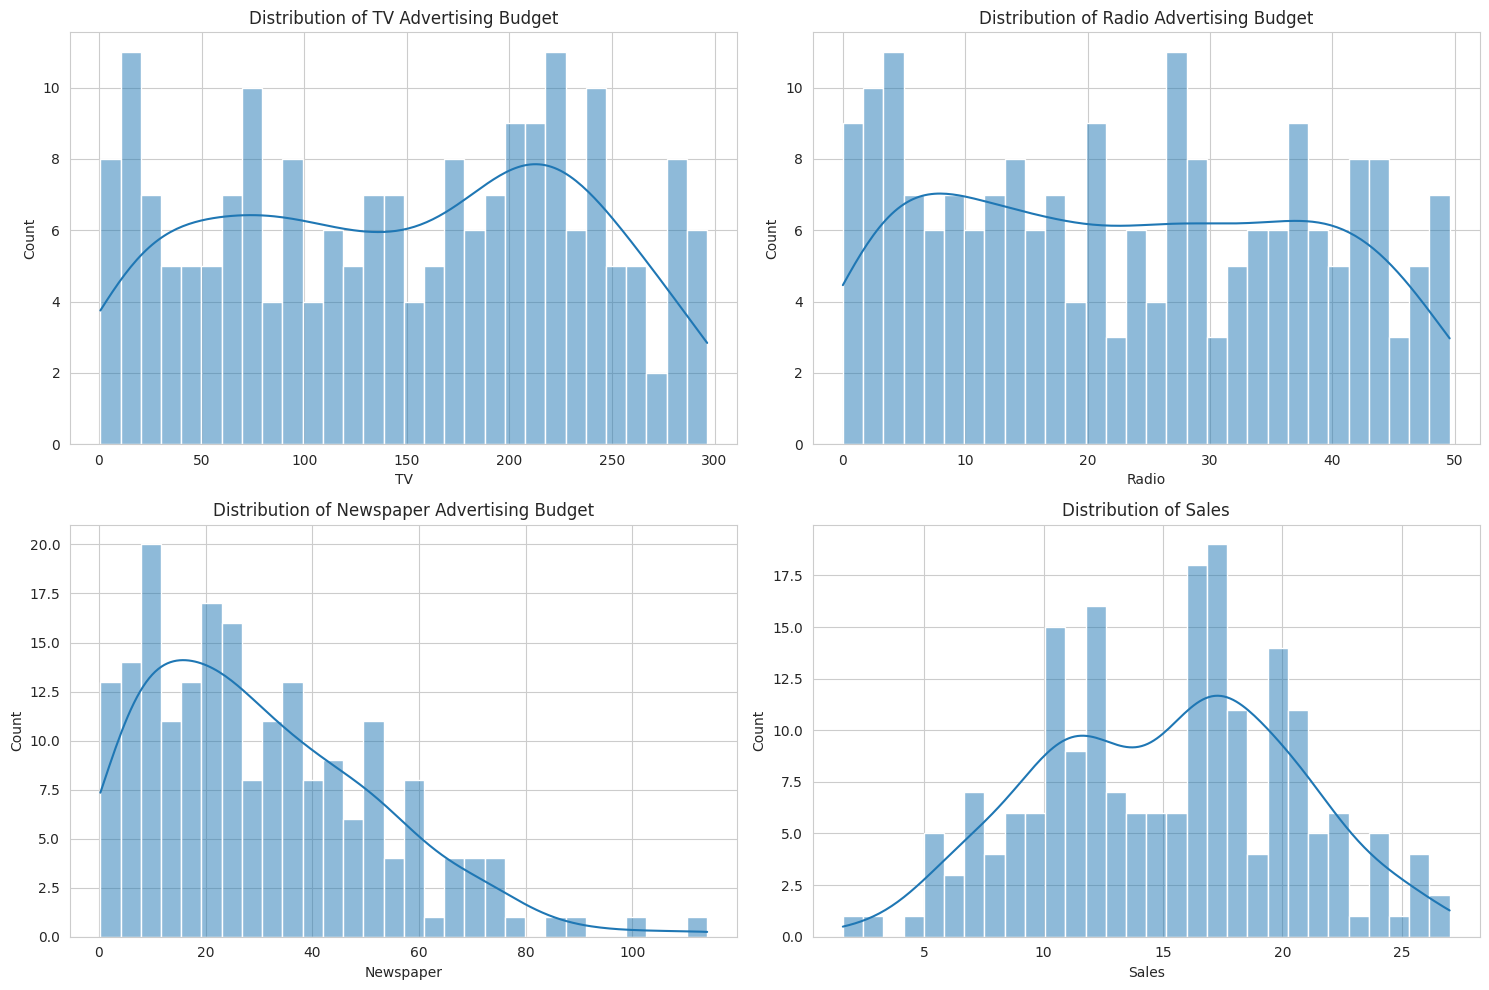

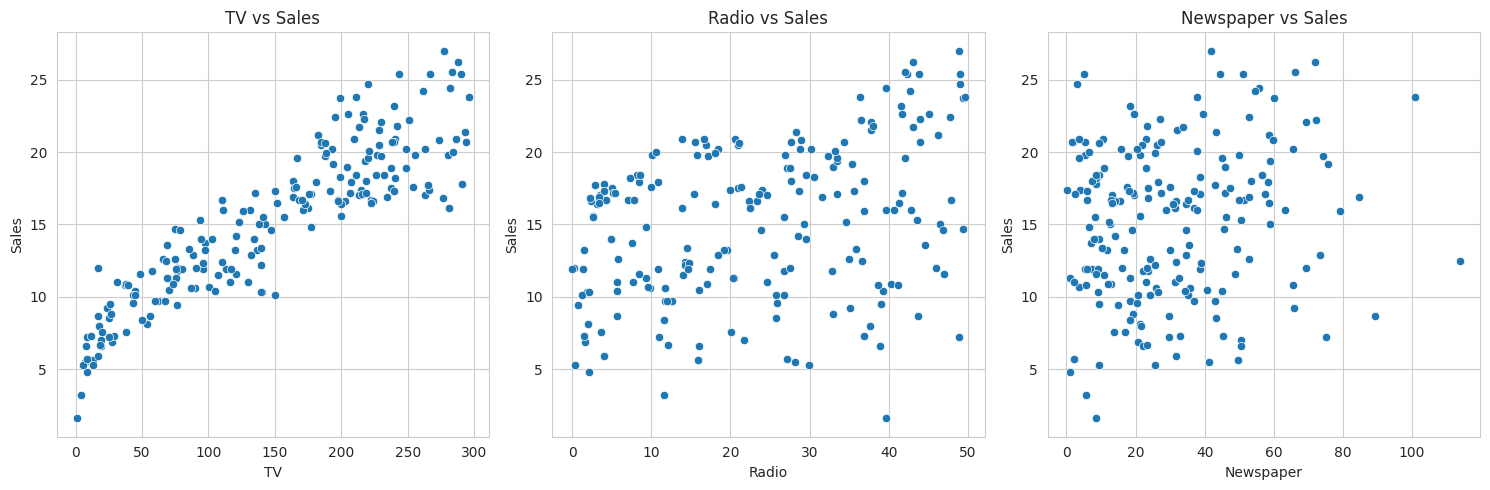

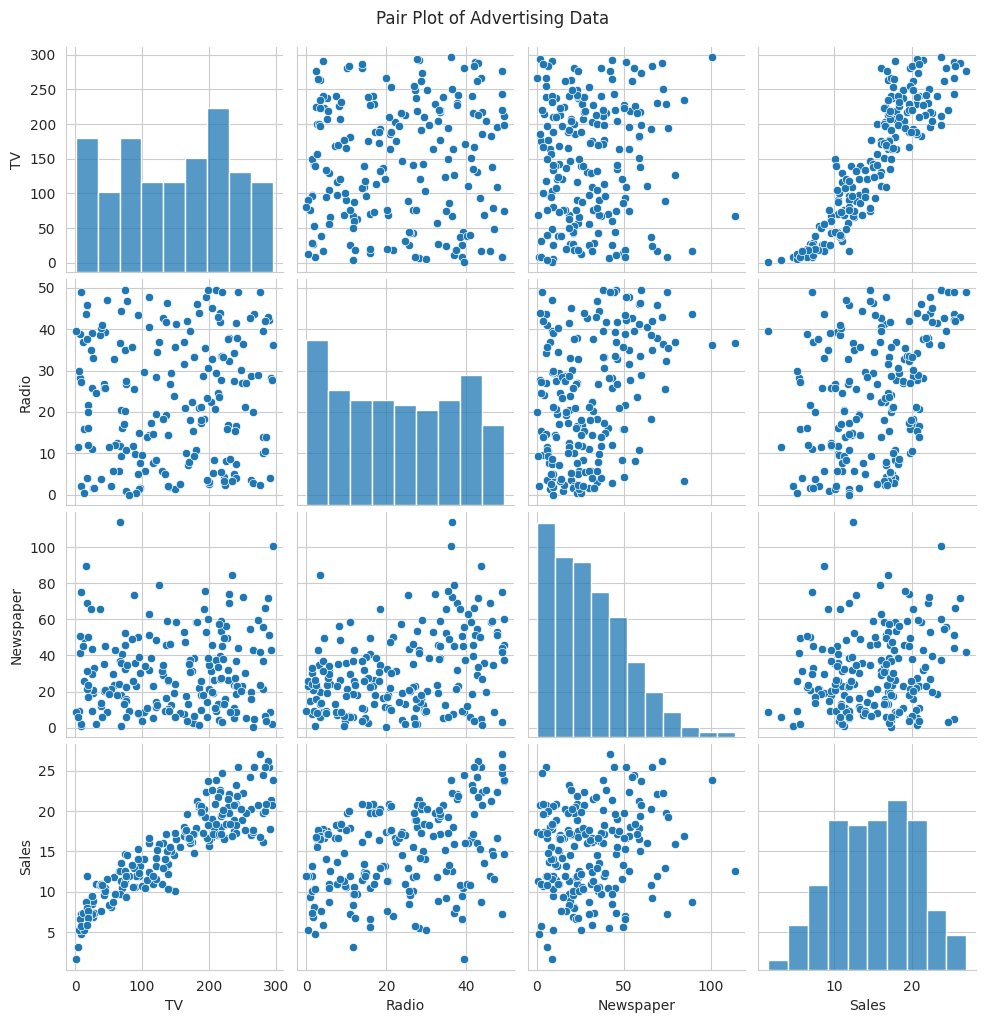

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create histograms for each variable
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['TV'], kde=True, bins=30)
plt.title('Distribution of TV Advertising Budget')

plt.subplot(2, 2, 2)
sns.histplot(df['Radio'], kde=True, bins=30)
plt.title('Distribution of Radio Advertising Budget')

plt.subplot(2, 2, 3)
sns.histplot(df['Newspaper'], kde=True, bins=30)
plt.title('Distribution of Newspaper Advertising Budget')

plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

# Create scatter plots to visualize relationships with Sales
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

# Generate a pair plot of all variables
sns.pairplot(df)
plt.suptitle('Pair Plot of Advertising Data', y=1.02)
plt.show()

## Split the data

### Subtask:
Split the dataset into training and testing sets to train and evaluate the model.


**Reasoning**:
Define the features (X) and the target variable (y) and then split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


## Train the model

### Subtask:
Train a linear regression model from scratch on the training data, implementing both batch and online learning approaches.


**Reasoning**:
Convert the training data to NumPy arrays and implement both batch and online gradient descent for linear regression.



In [ ]:
import numpy as np

# 1. Convert training data to NumPy arrays and add intercept term
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1) # Reshape y to a column vector

# Add a column of ones to X_train_np for the intercept term
X_train_with_intercept = np.c_[np.ones(X_train_np.shape[0]), X_train_np]

# 2. Implement Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    weights = np.zeros((X.shape[1], 1)) # Initialize weights (coefficients and intercept)
    mse_history = []

    for iteration in range(n_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)
        weights -= learning_rate * gradients
        mse = np.mean(errors**2)
        mse_history.append(mse)

    return weights, mse_history

# Set parameters for Batch Gradient Descent
learning_rate_batch = 0.00001
n_iterations_batch = 10000

# Train the model using Batch Gradient Descent
batch_weights, mse_history_batch = batch_gradient_descent(X_train_with_intercept, y_train_np, learning_rate_batch, n_iterations_batch)

print("Batch Gradient Descent Training Complete.")
print("Final Batch Weights:", batch_weights)


# 3. Implement Online (Stochastic) Gradient Descent
def online_gradient_descent(X, y, learning_rate, n_epochs):
    m, n = X.shape
    weights = np.zeros((n, 1)) # Initialize weights
    mse_history = []

    for epoch in range(n_epochs):
        epoch_errors = []
        for i in range(m):
            xi = X[i:i+1] # Select single example
            yi = y[i:i+1]
            prediction = xi.dot(weights)
            error = prediction - yi
            gradient = 2 * xi.T.dot(error) # Gradient for a single example
            weights -= learning_rate * gradient
            epoch_errors.append(error[0][0]**2) # Store squared error for MSE

        # Calculate MSE for the epoch
        mse = np.mean(epoch_errors)
        mse_history.append(mse)


    return weights, mse_history

# Set parameters for Online Gradient Descent
learning_rate_online = 0.00001
n_epochs_online = 1000

# Train the model using Online Gradient Descent
online_weights, mse_history_online = online_gradient_descent(X_train_with_intercept, y_train_np, learning_rate_online, n_epochs_online)

print("\nOnline Gradient Descent Training Complete.")
print("Final Online Weights:", online_weights)


Batch Gradient Descent Training Complete.
Final Batch Weights: [[0.13087536]
 [0.06739918]
 [0.1464918 ]
 [0.03678779]]

Online Gradient Descent Training Complete.
Final Online Weights: [[1.6132169 ]
 [0.05054394]
 [0.14244   ]
 [0.01121446]]


## Evaluate the model

### Subtask:
Assess the performance of the trained model on the testing data using metrics like Mean Squared Error and R-squared.


**Reasoning**:
The subtask requires assessing the performance of the trained models on the test data using MSE and R-squared. This involves preparing the test data, making predictions with both batch and online trained weights, and calculating the evaluation metrics. All these steps can be grouped into a single code block for efficiency.



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 1. Convert the test features X_test to a NumPy array and add a column of ones for the intercept term.
X_test_np = X_test.values
X_test_with_intercept = np.c_[np.ones(X_test_np.shape[0]), X_test_np]

# 2. Convert the test target y_test to a NumPy array and reshape it to a column vector.
y_test_np = y_test.values.reshape(-1, 1)

# 3. Calculate predictions on the test set using the weights obtained from the batch gradient descent model.
y_pred_batch = X_test_with_intercept.dot(batch_weights)

# 4. Calculate the Mean Squared Error (MSE) for the batch model's predictions on the test set.
mse_batch = mean_squared_error(y_test_np, y_pred_batch)

# 5. Calculate the R-squared score for the batch model's predictions on the test set.
r2_batch = r2_score(y_test_np, y_pred_batch)

# 6. Calculate predictions on the test set using the weights obtained from the online gradient descent model.
y_pred_online = X_test_with_intercept.dot(online_weights)

# 7. Calculate the Mean Squared Error (MSE) for the online model's predictions on the test set.
mse_online = mean_squared_error(y_test_np, y_pred_online)

# 8. Calculate the R-squared score for the online model's predictions on the test set.
r2_online = r2_score(y_test_np, y_pred_online)

# 9. Print the calculated MSE and R-squared values for both the batch and online models.
print("Batch Model Performance on Test Data:")
print(f"  Mean Squared Error (MSE): {mse_batch:.4f}")
print(f"  R-squared (R2): {r2_batch:.4f}")

print("\nOnline Model Performance on Test Data:")
print(f"  Mean Squared Error (MSE): {mse_online:.4f}")
print(f"  R-squared (R2): {r2_online:.4f}")

Batch Model Performance on Test Data:
  Mean Squared Error (MSE): 6.2102
  R-squared (R2): 0.7990

Online Model Performance on Test Data:
  Mean Squared Error (MSE): 6.8220
  R-squared (R2): 0.7792


## Make predictions

### Subtask:
Use the trained models (batch and online) to make predictions on new or unseen data.


**Reasoning**:
Create new data points, add an intercept term, and use the trained batch and online models to predict sales for these new data points, then print the results.



In [ ]:
import numpy as np
import pandas as pd

# 1. Create a small DataFrame representing new, unseen data points
new_data = pd.DataFrame({
    'TV': [100, 250, 50],
    'Radio': [20, 40, 5],
    'Newspaper': [10, 30, 5]
})

# 2. Add a column of ones to this new data for the intercept term
new_data_np = new_data.values
new_data_with_intercept = np.c_[np.ones(new_data_np.shape[0]), new_data_np]

# 3. Use the batch_weights to calculate predictions for the new data
new_predictions_batch = new_data_with_intercept.dot(batch_weights)

# 4. Use the online_weights to calculate predictions for the new data
new_predictions_online = new_data_with_intercept.dot(online_weights)

# 5. Print the new data points and the corresponding predicted sales
print("New Data Points:")
display(new_data)

print("\nPredicted Sales (Batch Model):")
display(new_predictions_batch)

print("\nPredicted Sales (Online Model):")
display(new_predictions_online)

New Data Points:


,TV,Radio,Newspaper
0,100,20,10
1,250,40,30
2,50,5,5



Predicted Sales (Batch Model):


array([[10.16850691],
       [23.94397519],
       [ 4.41723215]])


Predicted Sales (Online Model):


array([[ 9.62855534],
       [20.28323526],
       [ 4.90868611]])

## Summary:

### Data Analysis Key Findings

*   The dataset contains information on advertising budgets for TV, Radio, and Newspaper, along with Sales.
*   Visualizations showed a strong positive correlation between TV advertising budget and Sales, a moderate positive correlation between Radio advertising budget and Sales, and a weaker or less clear relationship between Newspaper advertising budget and Sales.
*   The dataset was successfully split into training (80%) and testing (20%) sets, resulting in 160 training samples and 40 testing samples.
*   Both Batch and Online Gradient Descent algorithms were implemented from scratch to train the linear regression model.
*   The Batch Gradient Descent model achieved a Mean Squared Error (MSE) of 6.2102 and an R-squared (R2) of 0.7990 on the test data.
*   The Online Gradient Descent model achieved a Mean Squared Error (MSE) of 6.8220 and an R-squared (R2) of 0.7792 on the test data.
*   Predictions for new data points were successfully generated using the weights from both the batch and online trained models, showing slight differences in their output.

### Insights or Next Steps

*   The Batch Gradient Descent model performed slightly better than the Online Gradient Descent model in this case, likely due to reaching a more stable minimum on this particular dataset and with the chosen parameters.
*   Further analysis could involve tuning the hyperparameters (learning rate, number of iterations/epochs) for both batch and online gradient descent to potentially improve performance and observe how these parameters affect convergence and final weights.
